In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix


# Load dataset

In [2]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

# Display basic dataset information

In [3]:
df.shape

(70000, 19)

In [4]:
# Check for missing values
df.isnull().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

np.int64(6245)

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

# Exploratory Data Analysis (EDA)

In [7]:
sns.set(style="whitegrid")

## 1. Target Variable Distribution

/tmp/ipykernel_10418/1068103225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Heart_Risk"], palette="coolwarm")


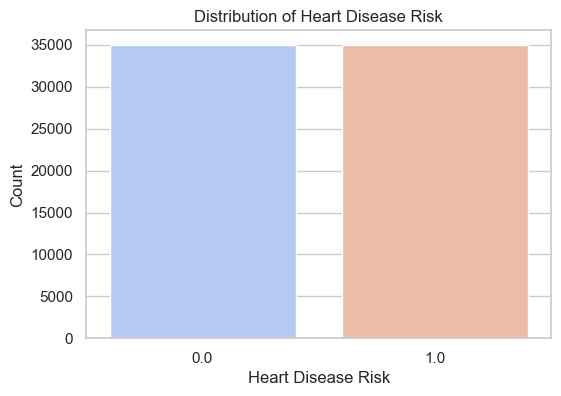

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Heart_Risk"], palette="coolwarm")
plt.xlabel("Heart Disease Risk")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease Risk")
plt.show()


## 2. Feature Distributions

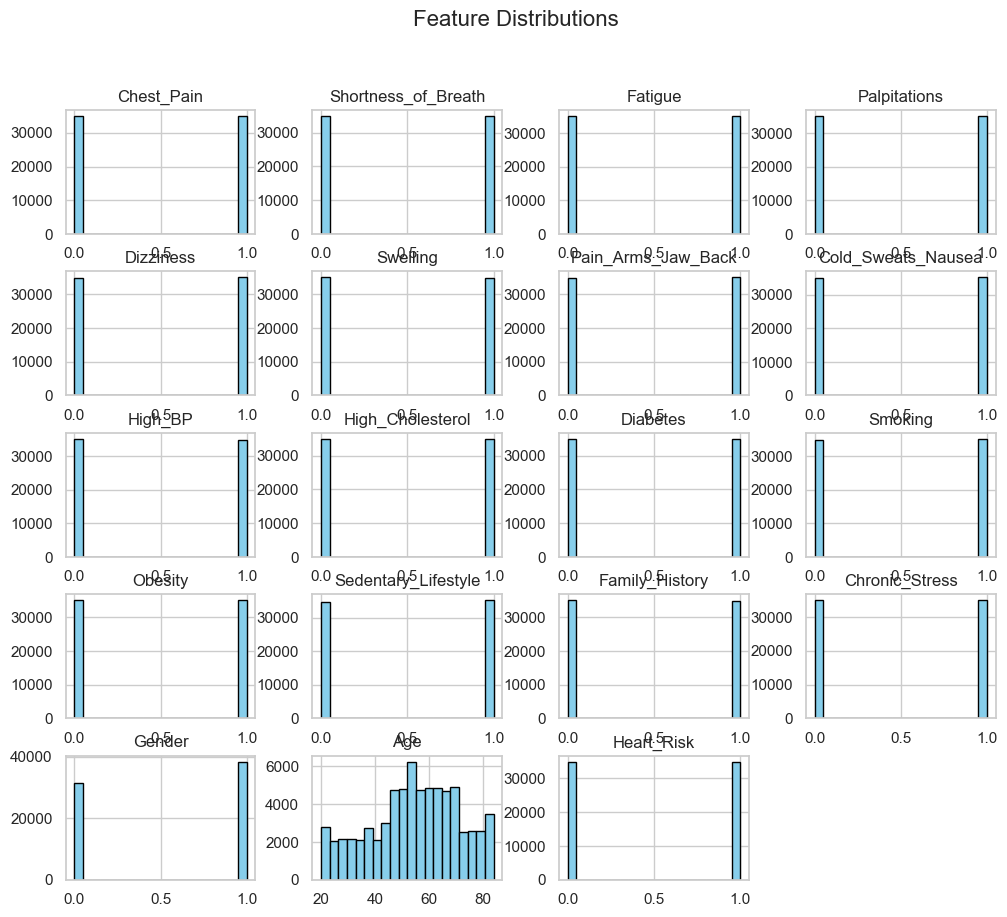

In [10]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## 3. Correlation Heatmap

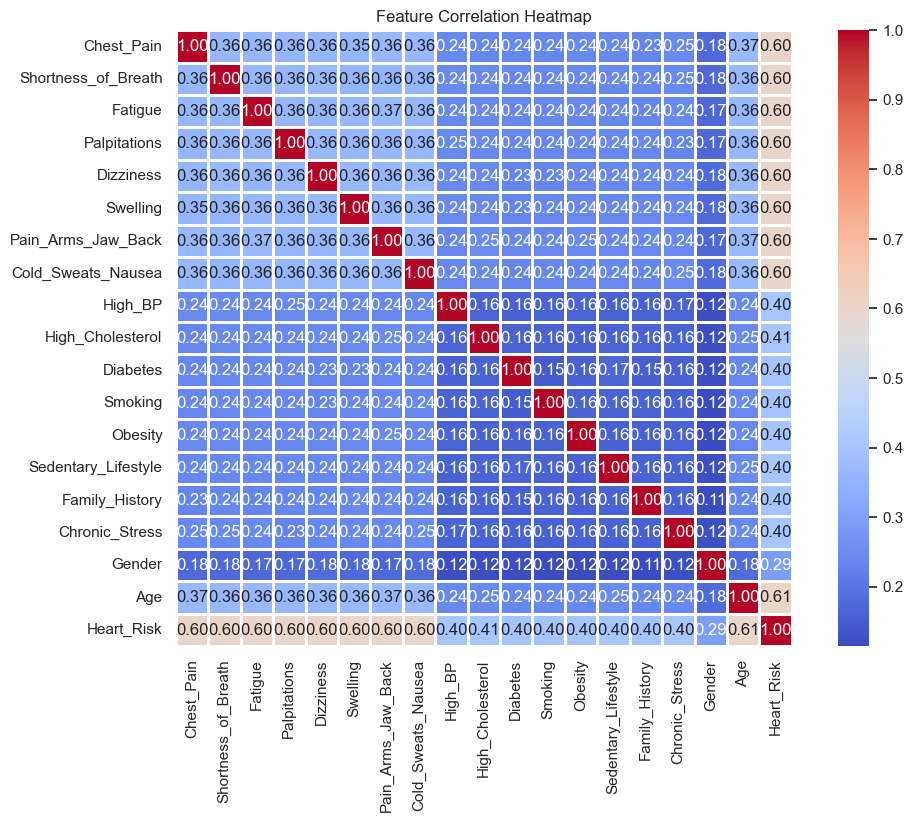

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


## 4. Boxplots for Outlier Detection

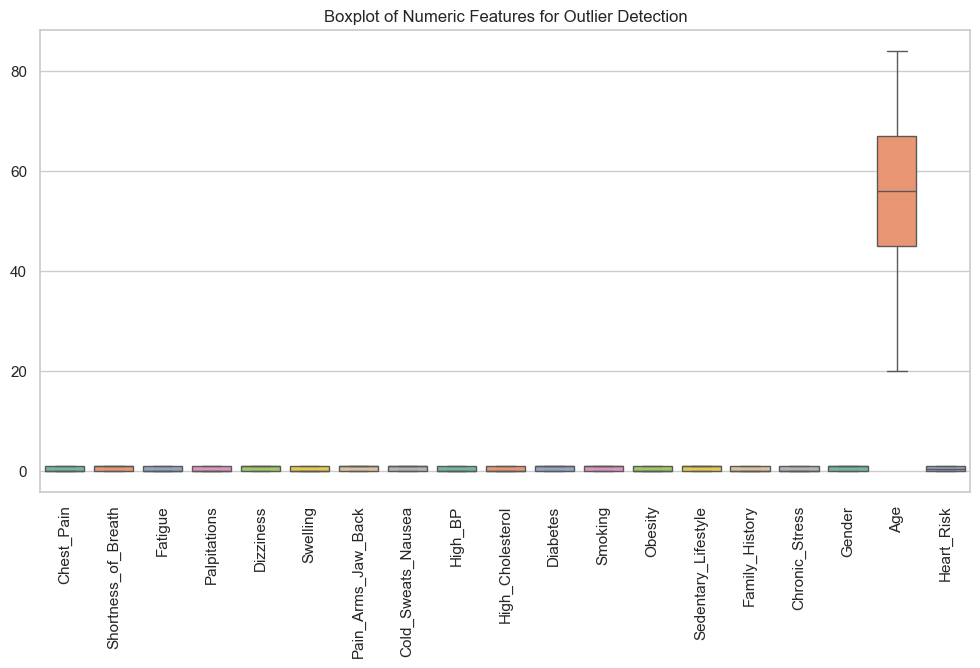

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["float64", "int64"]), palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features for Outlier Detection")
plt.show()

# Prediction

In [19]:
# Drop high-correlation symptoms to avoid data leakage
high_corr_features = [
    "Pain_Arms_Jaw_Back", "Cold_Sweats_Nausea", "Dizziness", "Chest_Pain",
    "Fatigue", "Swelling", "Shortness_of_Breath", "Palpitations"
]
df_cleaned = df.drop(columns=high_corr_features)

In [20]:
# Define features and target
X = df_cleaned.drop(columns=["Heart_Risk"])
y = df_cleaned["Heart_Risk"]

# Train-Test Split and Scaling

In [21]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Feature Importance (Logistic Regression)

/tmp/ipykernel_10418/2181310176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logreg_importances, y=logreg_importances.index, palette="viridis")


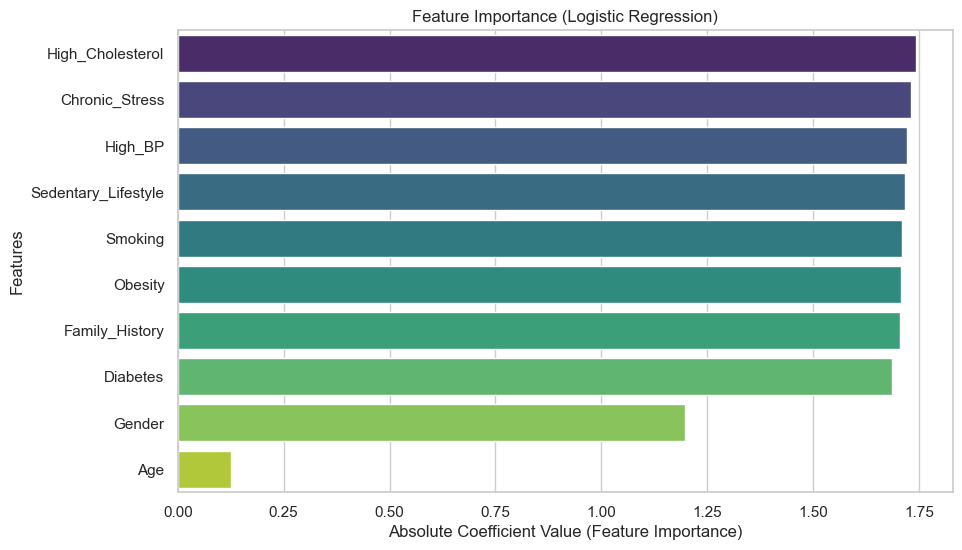

In [23]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X, y)
logreg_importances = pd.Series(np.abs(logreg_model.coef_[0]), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=logreg_importances, y=logreg_importances.index, palette="viridis")
plt.xlabel("Absolute Coefficient Value (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

## 6. Feature Importance (Gradien Boosting Classifier)

/tmp/ipykernel_10418/2867837845.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_importances.index, palette="viridis")


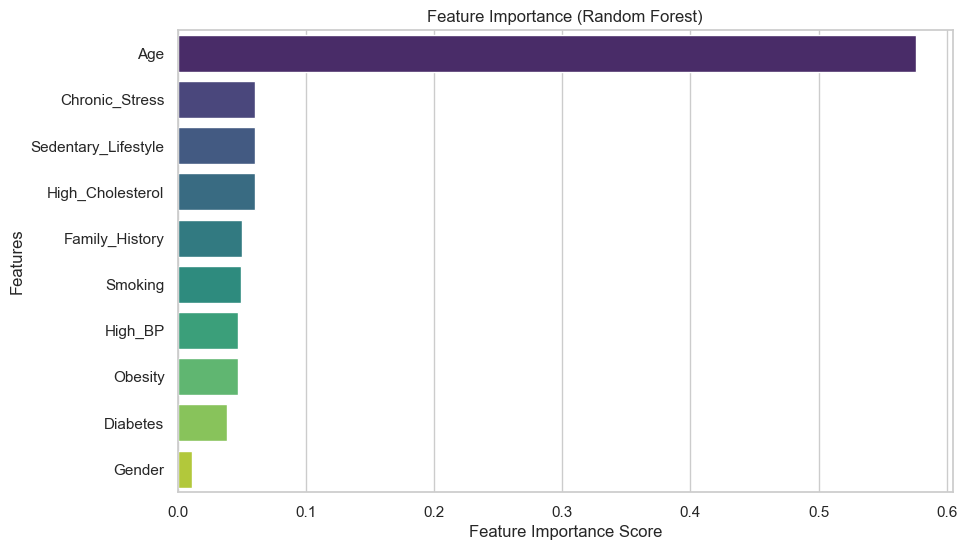

In [24]:
# Train a Random Forest model
gf_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gf_model.fit(X, y)

# Get feature importance
feature_importances = pd.Series(gf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Train Models

In [25]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

In [26]:
# Train models and evaluate
results = {}
auc_scores = {}
log_losses = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC and log loss
    
    # Store predictions for visualization
    predictions[name] = y_pred
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    logloss = log_loss(y_test, y_proba)

    # Store results
    results[name] = accuracy
    auc_scores[name] = auc
    log_losses[name] = logloss

    # Print classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
# Display accuracy, AUC-ROC, and Log Loss
results, auc_scores, log_losses

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      7000
         1.0       0.92      0.92      0.92      7000

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      7000
         1.0       0.94      0.94      0.94      7000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

--------------------------------------------------
Model: XGBoost


/home/akasha/my_virtual_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:36:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      7000
         1.0       0.93      0.94      0.94      7000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

--------------------------------------------------
Model: AdaBoost
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      7000
         1.0       0.94      0.94      0.94      7000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

--------------------------------------------------


({'Logistic Regression': 0.9232142857142858,
  'Gradient Boosting': 0.9409285714285714,
  'XGBoost': 0.9357857142857143,
  'AdaBoost': 0.9408571428571428},
 {'Logistic Regression': np.float64(0.9794021938775509),
  'Gradient Boosting': np.float64(0.9861111530612245),
  'XGBoost': np.float64(0.9849217857142858),
  'AdaBoost': np.float64(0.9864435)},
 {'Logistic Regression': 0.18346707327091508,
  'Gradient Boosting': 0.15226399475363567,
  'XGBoost': 0.15769781625554044,
  'AdaBoost': 0.4053920110624818})

# Actual vs Predicted Plot (for each model)

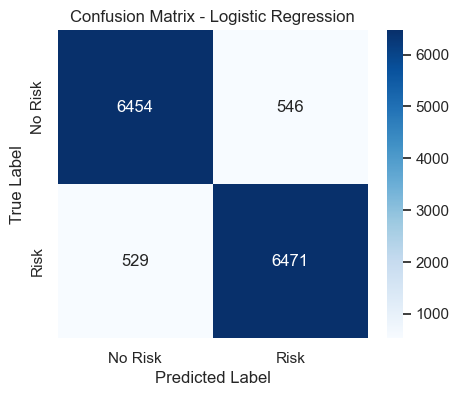

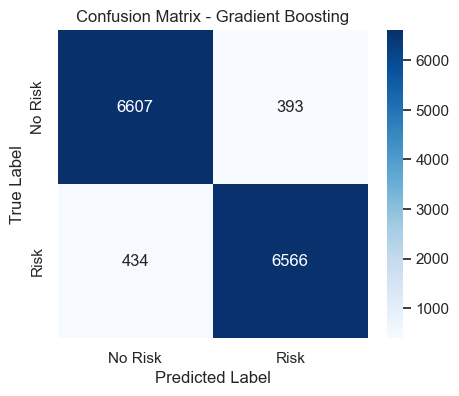

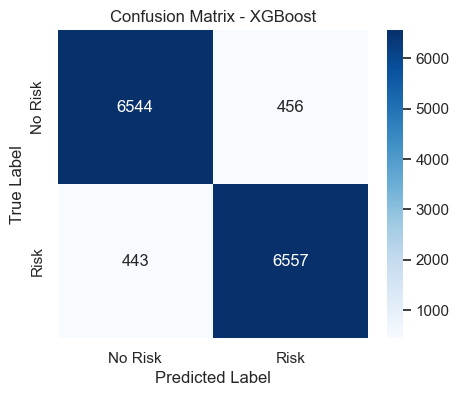

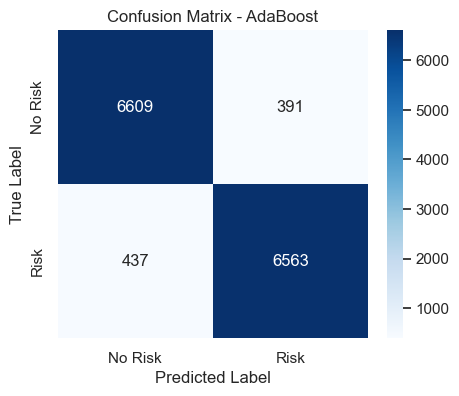

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for all models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)

# **Final Conclusion and Summary**

## **Overall Model Performance**
- The models achieved high accuracy, ranging from **92% (Logistic Regression) to 94% (Gradient Boosting, XGBoost, and AdaBoost)**.
- **Gradient Boosting, XGBoost, and AdaBoost** performed slightly better than **Logistic Regression**.

---

## **Comparison of Models**
| **Model**                | **Accuracy** | **Remarks** |
|--------------------------|-------------|-------------|
| **Logistic Regression**  | **92%**      | Simple and interpretable, good baseline model. |
| **Gradient Boosting**    | **94%**      | Better performance, balances bias and variance well. |
| **XGBoost**             | **94%**      | Similar to Gradient Boosting but with efficiency gains. |
| **AdaBoost**            | **94%**      | Effective ensemble learning method. |

---

## **Key Observations**
✅ **Precision, recall, and F1-scores were consistently high** across all models, indicating strong predictive power.  
✅ **Gradient Boosting, XGBoost, and AdaBoost outperformed Logistic Regression**, confirming the advantage of ensemble learning.  
✅ **Class balance:** The dataset had equal support for both classes (0 and 1), meaning class imbalance did not affect performance.  

---

## **Next Steps & Improvements**
📌 **Hyperparameter Tuning:** Fine-tuning can further enhance **XGBoost and AdaBoost**.  
📌 **Feature Engineering:** Adding domain-specific features or removing redundant ones can improve performance.  
📌 **Handling Warnings:**
   - **XGBoost:** Fix `use_label_encoder` deprecation warning.
   - **AdaBoost:** Address `SAMME.R` deprecation notice in future iterations.

---

## **Final Recommendation** 🏆
- **Best Models:** **Gradient Boosting, XGBoost, and AdaBoost** are the **top choices** for predicting heart disease risk.  
- **XGBoost** is particularly promising due to its efficiency and scalability.  
- If **interpretability is a priority**, **Logistic Regression** remains a **strong choice**.

---

🎯 **Next Steps:** Would you like to visualize model comparisons using **confusion matrices or ROC curves**? 🚀
